In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")

In [2]:
data = pd.read_csv("diabetes.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].median())

In [6]:
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].median())

In [7]:
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [8]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

In [9]:
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

In [10]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [12]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


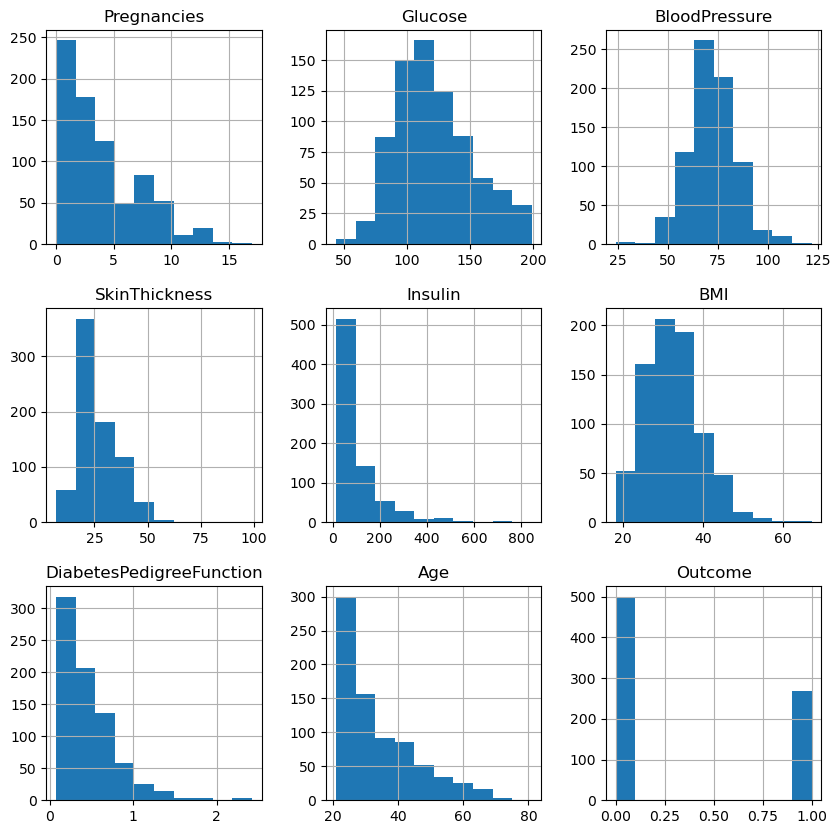

In [13]:
data.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: >

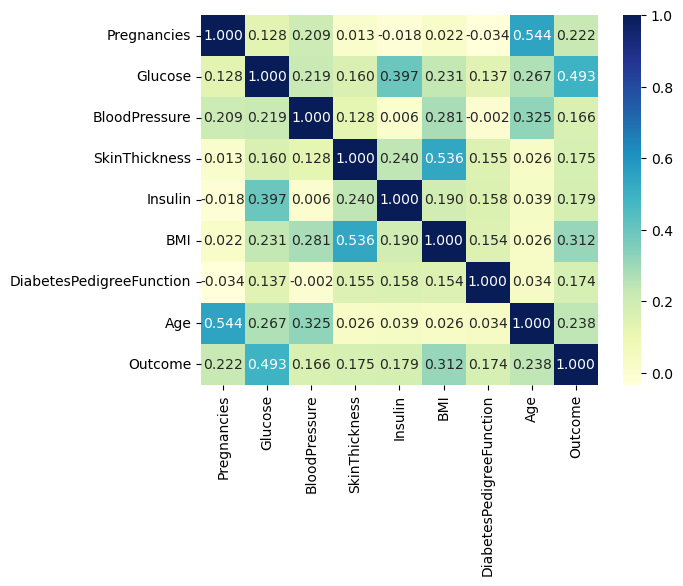

In [14]:
sns.heatmap(data.corr(), annot = True, fmt = ".3f", cmap = "YlGnBu")  


<Axes: xlabel='count', ylabel='Outcome'>

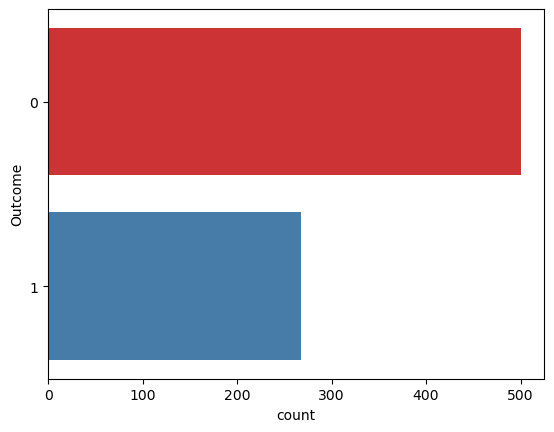

In [15]:
sns.countplot(y=data['Outcome'],palette='Set1')


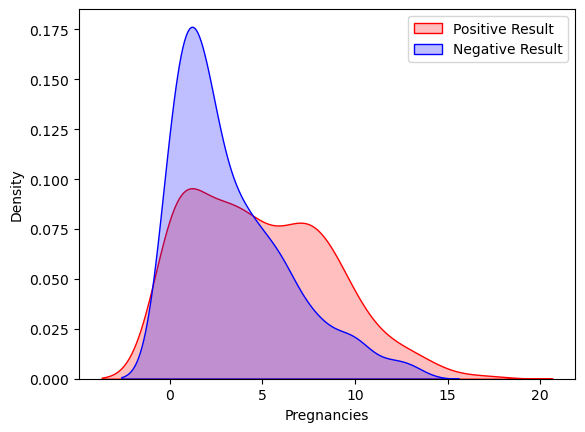

In [16]:
kde = sns.kdeplot(data["Pregnancies"][data["Outcome"] == 1], color = "Red", fill = True)  
kde = sns.kdeplot(data["Pregnancies"][data["Outcome"] == 0], ax = kde, color = "Blue", fill= True)  
kde.set_xlabel("Pregnancies")  
kde.set_ylabel("Density")  
kde.legend(["Positive Result", "Negative Result"])

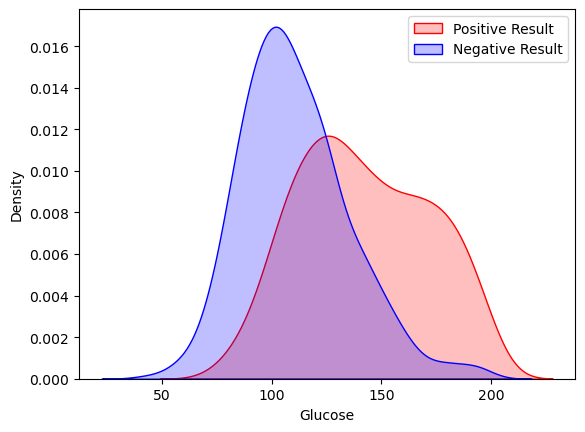

In [17]:
kde = sns.kdeplot(data["Glucose"][data["Outcome"] == 1], color = "Red", fill = True)  
kde = sns.kdeplot(data["Glucose"][data["Outcome"] == 0], ax = kde, color = "Blue", fill= True)  
kde.set_xlabel("Glucose")  
kde.set_ylabel("Density")  
kde.legend(["Positive Result", "Negative Result"])

In [18]:
for feature in data:
    
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if data[(data[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

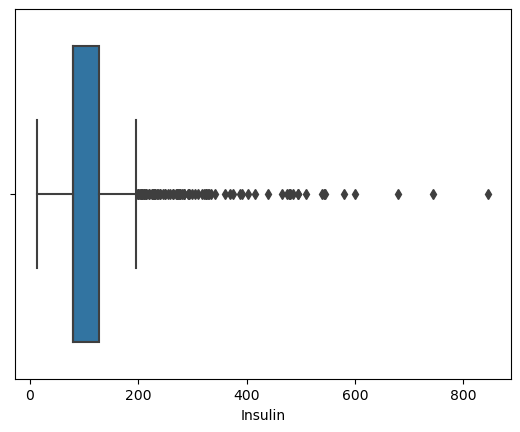

In [19]:
import seaborn as sns
sns.boxplot(x = data["Insulin"])

In [20]:
Q1 = data.Insulin.quantile(0.25)
Q3 = data.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data.loc[data["Insulin"] > upper,"Insulin"] = upper

<Axes: xlabel='Insulin'>

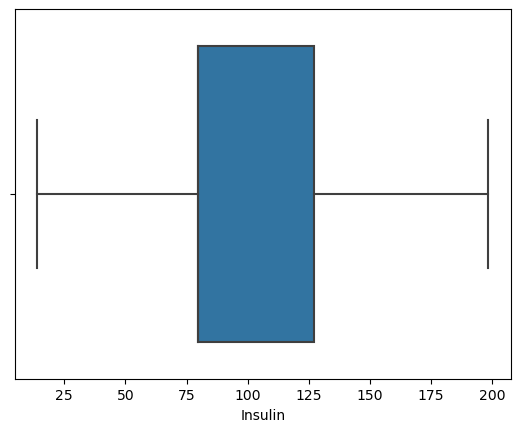

In [21]:
import seaborn as sns
sns.boxplot(x = data["Insulin"])

In [22]:
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(data)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [23]:
data_scores = lof.negative_outlier_factor_
np.sort(data_scores)[0:30]

array([-3.17882976, -2.74632601, -2.10342712, -2.00670762, -1.96026765,
       -1.95451646, -1.9433235 , -1.88989748, -1.86710202, -1.79741217,
       -1.77756701, -1.76146499, -1.73661463, -1.71956334, -1.68098335,
       -1.65373642, -1.65252188, -1.61365976, -1.60880008, -1.57585418,
       -1.52532398, -1.5234791 , -1.5201207 , -1.517951  , -1.51114435,
       -1.50573798, -1.49138946, -1.49111835, -1.48598444, -1.46937162])

In [24]:
threshold = np.sort(data_scores)[7]
threshold

-1.8898974818152503

In [25]:
outlier = data_scores > threshold
data = data[outlier]

In [26]:
data.shape

(760, 9)

In [27]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
data["NewBMI"] = NewBMI
data.loc[data["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
data.loc[(data["BMI"] > 18.5) & (data["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
data.loc[(data["BMI"] > 24.9) & (data["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
data.loc[(data["BMI"] > 29.9) & (data["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
data.loc[(data["BMI"] > 34.9) & (data["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
data.loc[data["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [28]:
NewInsulinScore = pd.Series(["Abnormal", "Normal"], dtype="category")
data["NewInsulinScore"] = NewInsulinScore
data.loc[data["Insulin"] < 16, "NewInsulinScore"] = NewInsulinScore[0]
data.loc[(data["Insulin"] > 16) & (data["Insulin"] <= 166), "NewInsulinScore"] = NewInsulinScore[1]
data.loc[data["Insulin"] > 166, "NewInsulinScore"] = NewInsulinScore[0]

In [29]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1,Obesity 1,Normal
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0,Overweight,Normal
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1,Normal,Normal
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0,Overweight,Normal
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1,Obesity 3,Abnormal


In [30]:
NewGlucose = pd.Series(["Low", "Normal", "Secret", "High"], dtype = "category")
data["NewGlucose"] = NewGlucose
data.loc[data["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
data.loc[(data["Glucose"] > 70) & (data["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
data.loc[(data["Glucose"] > 99) & (data["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
data.loc[data["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [31]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1,Obesity 1,Normal,High
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1,Normal,Normal,High
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1,Obesity 3,Abnormal,High


In [32]:
data = pd.get_dummies(data, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [33]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Secret
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1,1,0,0,0,0,1,0,0,0
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1,0,0,0,0,0,1,0,0,0
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0


In [34]:
categorical_data=data[["NewBMI_Obesity 1","NewBMI_Obesity 2","NewBMI_Obesity 3","NewBMI_Overweight","NewBMI_Underweight","NewInsulinScore_Normal","NewGlucose_Low","NewGlucose_Normal","NewGlucose_Secret"]]
categorical_data.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Secret
0,1,0,0,0,0,1,0,0,0
1,0,0,0,1,0,1,0,1,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,1,0,1,0
4,0,0,1,0,0,0,0,0,0


In [35]:
categorical_data.shape

(760, 9)

In [36]:
y = data["Outcome"]
X = data.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight','NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

In [37]:
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,79.799479,33.6,0.627,50
1,1,85,66,29.000000,79.799479,26.6,0.351,31
2,8,183,64,20.536458,79.799479,23.3,0.672,32
3,1,89,66,23.000000,94.000000,28.1,0.167,21
4,0,137,40,35.000000,168.000000,43.1,2.288,33


In [38]:
from sklearn.preprocessing import RobustScaler
transformer=RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X,columns=cols)

In [39]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.775,0.000,1.046797,0.000000,0.178771,0.674984,1.235294
1,-0.4,-0.800,-0.375,0.523398,0.000000,-0.603352,-0.049902,0.117647
2,1.0,1.650,-0.500,-0.214902,0.000000,-0.972067,0.793171,0.176471
3,-0.4,-0.700,-0.375,0.000000,0.287166,-0.435754,-0.533158,-0.470588
4,-0.6,0.500,-2.000,1.046797,1.783612,1.240223,5.037426,0.235294


In [40]:
X.reset_index(drop=True, inplace=True)
categorical_data.reset_index(drop=True, inplace=True)

In [41]:
X = pd.concat([X,categorical_data], axis = 1)


In [42]:
X.shape

(760, 17)

In [43]:
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Secret
0,0.6,0.775,0.000,1.046797,0.000000,0.178771,0.674984,1.235294,1,0,0,0,0,1,0,0,0
1,-0.4,-0.800,-0.375,0.523398,0.000000,-0.603352,-0.049902,0.117647,0,0,0,1,0,1,0,1,0
2,1.0,1.650,-0.500,-0.214902,0.000000,-0.972067,0.793171,0.176471,0,0,0,0,0,1,0,0,0
3,-0.4,-0.700,-0.375,0.000000,0.287166,-0.435754,-0.533158,-0.470588,0,0,0,1,0,1,0,1,0
4,-0.6,0.500,-2.000,1.046797,1.783612,1.240223,5.037426,0.235294,0,0,1,0,0,0,0,0,0


In [44]:
y.head()


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [45]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))

results = []
names = []

In [46]:
for name,model in models:
    kfold=KFold(n_splits=10 ,shuffle=True, random_state=12345)
    cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.764474 (0.042616)
KNN: 0.739474 (0.035696)
CART: 0.694737 (0.054506)
RF: 0.757895 (0.039997)
SVM: 0.768421 (0.046034)
XGB: 0.750000 (0.042023)


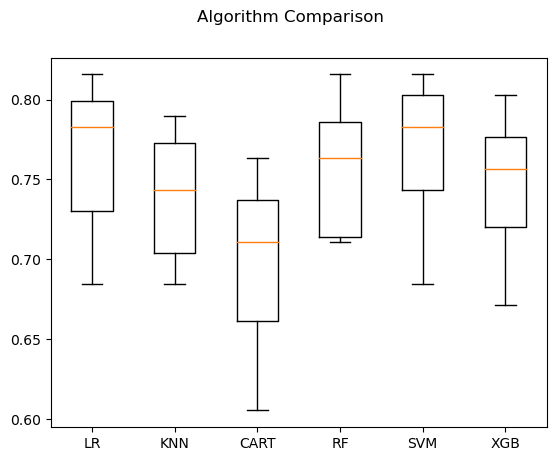

In [47]:
plt.suptitle('Algorithm Comparison')
plt.boxplot(results)
plt.xticks(range(1, len(names) + 1), names)
plt.show()

In [48]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [49]:
rf_model = RandomForestClassifier(random_state = 12345)


In [50]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [51]:
gs_cv.best_params_


{'max_depth': 8,
 'max_features': 7,
 'min_samples_split': 5,
 'n_estimators': 100}

In [52]:
rf_tuned=RandomForestClassifier(**gs_cv.best_params_)
rf_tuned=rf_tuned.fit(X,y)

In [53]:
cross_val_score(rf_tuned,X,y,cv=10).mean()

0.7644736842105263

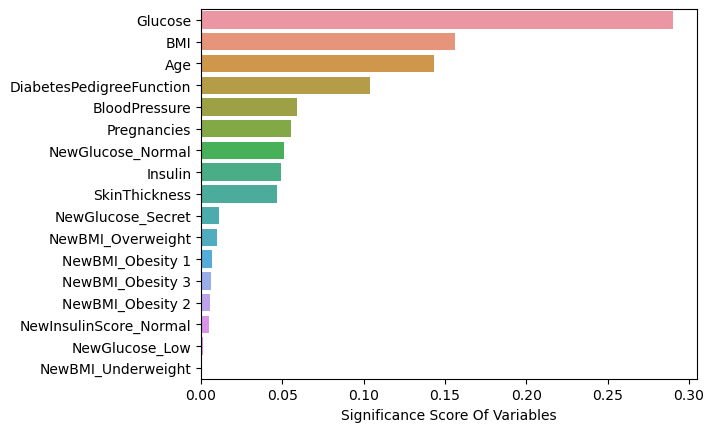

In [54]:
feature_importance = pd.Series(rf_tuned.feature_importances_,index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Significance Score Of Variables')
plt.show()

In [74]:
svc_model = SVC(random_state = 12345)


In [75]:
svc_params={
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1]
}

In [76]:
gs_cv =GridSearchCV(svc_model, 
                    svc_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


In [77]:
gs_cv.best_params_


{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}

In [78]:
svc_tuned=SVC(**gs_cv.best_params_)
svc_tuned=svc_tuned.fit(X,y)

In [79]:
cross_val_score(svc_tuned,X,y,cv=10).mean()

0.7684210526315789

In [80]:
result = permutation_importance(svc_tuned, X, y, n_repeats=10, random_state=12345)
feature_importance = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Significance Score Of Variables')
plt.show()

NameError: name 'permutation_importance' is not defined

In [81]:
lr = LogisticRegression(random_state = 12345)


In [82]:
lr_params_ = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [83]:
lr_cv_model  = GridSearchCV(lr,lr_params_, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [84]:
lr_cv_model.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [85]:
lr_tuned=LogisticRegression(**lr_cv_model.best_params_)
lr_tuned=lr_tuned.fit(X,y)

In [86]:
cross_val_score(lr_tuned, X, y, cv = 10).mean()


0.7657894736842105

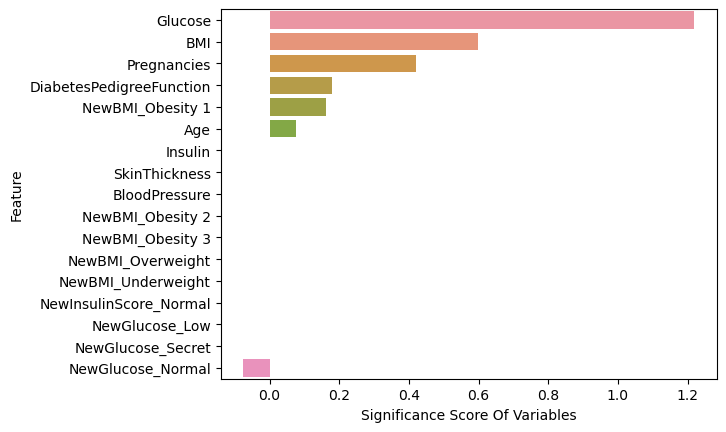

In [87]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_tuned.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

sns.barplot(x='Coefficient', y='Feature',data=feature_importance)
plt.xlabel('Significance Score Of Variables')
plt.show()

In [90]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 5, n_estimators = 1000)))
models.append(('SVC', SVC(random_state = 12345, C= 1.0, gamma= 'auto', kernel= 'rbf')))
models.append(("lr", LogisticRegression(random_state = 12345, C= 0.1, penalty= 'l1', solver= 'liblinear')))

results = []
names = []

RF: 0.776316 (0.055200)
SVC: 0.768421 (0.046034)
lr: 0.765789 (0.035208)


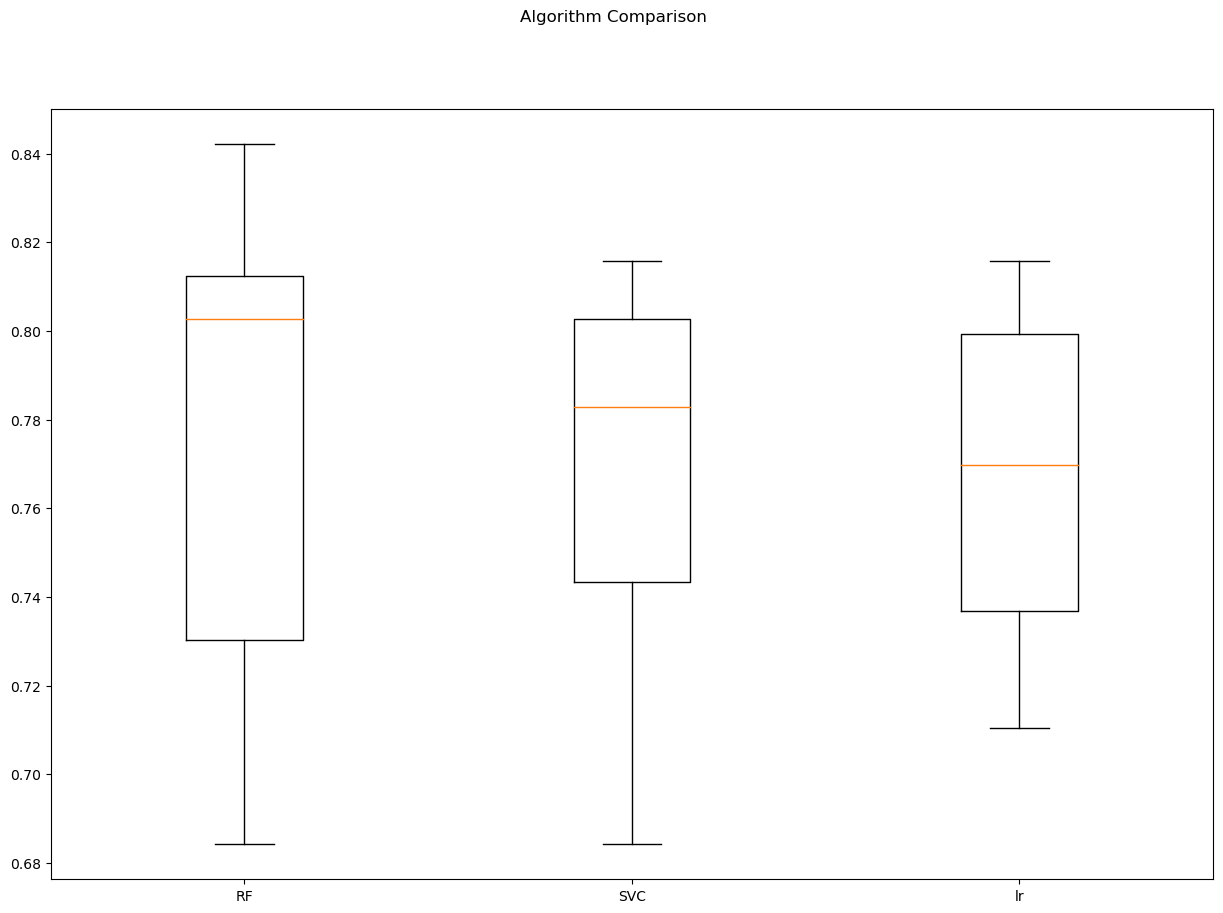

In [91]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345,shuffle=True)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        

fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)


In [94]:
X_test.shape

(152, 17)

In [95]:
X_train.shape

(608, 17)

In [97]:
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=5)

In [98]:
y_pred = rf_tuned.predict(X_test)


In [101]:
print(classification_report(y_test, y_pred))  


              precision    recall  f1-score   support

           0       0.78      0.77      0.78        97
           1       0.61      0.62      0.61        55

    accuracy                           0.72       152
   macro avg       0.69      0.70      0.69       152
weighted avg       0.72      0.72      0.72       152



In [104]:
confusion_mat = confusion_matrix(y_test, y_pred)


In [105]:
print(confusion_mat)

[[75 22]
 [21 34]]


In [106]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7171052631578947
